# Introduction - Exploratory Analysis

In this notebook, we will conduct an analysis of the data previously prepared in the path: `data/interim/hockey_teams.json`. This file, being partially processed, is easily accessible for import and ready for more detailed analytical examination.

This part of the workshop will focus on utilizing `pandas` and `matplotlib`, which were discussed during the course. The main objective is to familiarize ourselves with the dataset we are working on. Through a series of exercises:  
- we will get to know the structure of the data,  
- we will conduct elementary data exploration (EDA).

## Column Description

Below is a brief description of each column in our dataset:

- **Team Name**: The name of the team participating in the match.
- **Year**: The year in which the season takes place.
- **Wins**: The number of matches won by the team in the given season.
- **Losses**: The number of matches lost by the team in the given season.
- **OT Losses**: The number of matches lost by the team in overtime in the given season.
- **Win %**: The percentage of matches won by the team in the given season.
- **Goals For (GF)**: The number of goals scored by the team in the given season.
- **Goals Against (GA)**: The number of goals conceded by the team in the given season.
- **+ / -**: The difference between the number of goals scored and conceded by the team in the given season.

> Note: At this stage, certain significant simplifications were intentionally made in the analysis and they will not be explicitly mentioned, aiming for a discussion at the end of the workshop.

# Preparation

## Import libraries
Here, load the libraries that will be needed in the following steps

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the Dataset

We recommend loading the raw data into a variable with the suffix `_raw`. This will avoid the need to reload the data from the beginning in case of an error, which can be a time-consuming process.  
  
> **Tip:** A `json` file can be easily loaded using `pandas` with the `read_json` function - [click](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html)  

Load data from the `hockey_teams` file here

In [2]:
df_raw = pd.read_json('../data/interim/hockey_teams.json')

check here if the data loaded correctly

In [3]:
df_raw.head()

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,,0.388,292,278,14
2,Calgary Flames,1990,46,26,,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,,0.425,273,298,-25


# Preliminary Data Transformation

## Standardizing Column Names

Currently, our dataset contains original column names which, from a technical standpoint, should not contain spaces or other special characters.

In this section, we will standardize and simplify the naming conventions to facilitate data processing in subsequent stages. We will apply the following column name mapping:

- **Team Name** -> `team`
- **Year** -> `season`
- **Wins** -> `victories`
- **Losses** -> `defeats`
- **OT Losses** -> `overtime_defeats`
- **Win %** -> `victory_percentage`
- **Goals For (GF)** -> `scored_goals`
- **Goals Against (GA)** -> `received_goals`
- **\+ / -** -> `goal_difference`

> At this point, we recommend creating a new DataFrame without the `_raw` postfix. For example, if the data was loaded into the variable `df_raw`, we now want to work with the variable `df`, where we will modify the column names.

In [4]:
new_column_names = ['team', 'season', 'victories', 'defeats', 'overtime_defeats', 'victory_percentage', 'scored_goals', 'received_goals', 'goal_difference']
df = df_raw.copy()
df.columns = new_column_names

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   team                582 non-null    object 
 1   season              582 non-null    int64  
 2   victories           582 non-null    int64  
 3   defeats             582 non-null    int64  
 4   overtime_defeats    582 non-null    object 
 5   victory_percentage  582 non-null    float64
 6   scored_goals        582 non-null    int64  
 7   received_goals      582 non-null    int64  
 8   goal_difference     582 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 41.1+ KB


## Removing Empty Values

As can be observed, the `overtime_defeats` column contains many empty values, and the expected data type is `int`. Before proceeding with further analysis, this column needs to be properly prepared.

To achieve this, we will perform the following steps:
- Check which symbol is used as an indicator of an empty field.
- Fill the empty fields with a value of 0.
- Then convert the data type of this column to `int`.

By following these steps, the `overtime_defeats` column will be ready for further analysis.

### Finding the Indicator of an Empty Field

In [6]:
df['overtime_defeats'].iloc[0]

''

### Overwriting Empty Values with 0

In [7]:
df.loc[df['overtime_defeats'] == '', 'overtime_defeats'] = 0

### Column Type Conversion

In [8]:
df['overtime_defeats'] = df['overtime_defeats'].astype(int)

# Introduction to Dataset Analysis

In this section, we will focus on answering fundamental questions about our dataset in the context of hockey games. The goal is to become familiar with the dataset and develop an intuition about it.  
  
Here is a list of exercises we will perform to find answers to key questions:  
  
- How many teams have participated in league games over the years?  
- What is the total number of available seasons?  
- What is the time span of the data?  
- Are there any suspicious or outlier values in the numerical columns?  
  
These exercises will help us better understand the structure and nature of our data.  

### Number of teams that participated in league matches

Here, indicate the total number of teams available in our dataset

In [9]:
teams_total = df['team'].unique()
teams_total_amount = len(teams_total)

print(f'Liczba zespołów, która brała udział w rozgrywkach na przesteni lat: {teams_total_amount}')

Liczba zespołów, która brała udział w rozgrywkach na przesteni lat: 35


### Total number of seasons

Here, indicate the total number of seasons.

In [10]:
seasons_total = df['season'].unique()
seasons_total_amount = len(seasons_total)

print(f'Liczba sezonów, które były rozgrywane: {seasons_total_amount}')

Liczba sezonów, które były rozgrywane: 21


### Time Span of Data

Here, we will examine the availability of data for individual seasons. The analysis will be conducted in two stages:  
- First, we will determine the time range of the data by identifying the start year (`start_year`) and the end year (`end_year`). This will allow us to establish for which seasons we have information.  
- Next, we will look for any gaps in the time data to ensure that we have a complete set of information for each season.   

At this point, we will determine the start year and end year of the data:

In [11]:
start_year = df['season'].min()
end_year = df['season'].max()

print(f'Rozgrywki były rozgrywane w latach: {start_year} - {end_year}')

Rozgrywki były rozgrywane w latach: 1990 - 2011


Here, we will check if data is present for each year within the determined range:

In [12]:
len(df['season'].unique()) == end_year - start_year

np.True_

### Analysis of Numerical Columns

Here we will examine the basic descriptive statistics for numerical columns.

To this end, describe and analyze the results for the following columns:

- victories
- defeats
- overtime_defeats
- victory_percentage
- scored_goals
- received_goals
- goal_difference

We are interested in the following statistics:
- mean,
- count,
- standard deviation,
- percentiles = `[0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1]`

In [13]:
df.describe(percentiles=[0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1])

,season,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,2000.907216,36.943299,32.353952,4.589347,0.458519,234.063574,234.063574,0.000000
std,6.330674,8.926081,8.411439,4.605402,0.102237,40.548915,42.510718,45.277458
min,1990.000000,9.000000,11.000000,0.000000,0.119000,115.000000,115.000000,-196.000000
0%,1990.000000,9.000000,11.000000,0.000000,0.119000,115.000000,115.000000,-196.000000
5%,1991.000000,21.050000,20.000000,0.000000,0.280300,175.050000,168.050000,-72.000000
10%,1992.000000,24.100000,23.000000,0.000000,0.321000,190.100000,187.000000,-57.000000
25%,1996.000000,31.000000,27.000000,0.000000,0.390000,211.000000,207.000000,-27.000000
50%,2001.000000,38.000000,31.000000,4.000000,0.463000,231.000000,232.500000,4.000000
75%,2007.000000,43.000000,37.000000,8.000000,0.534000,254.000000,258.750000,31.000000


# `team`

In this section, we will conduct a series of analyses on individual teams participating in the leagues. This will allow us to identify the teams that have performed best in the competitions over the years.


## Analysis of Team Participation in League Seasons
Let's perform the following exercises:
- Check how many teams have participated in all seasons of the selected league.
- Display the list of these teams.

In [14]:
total_sesons = len(df['season'].unique())

team_in_seasons = (
    df
    .groupby(by='team')
    .size()
    .sort_values(ascending=False)
)

team_in_seasons.describe()

teams_in_all_seasons = team_in_seasons[team_in_seasons == total_sesons]
teams_amount_in_all_seasons = len(teams_in_all_seasons)

List of teams that participated in all seasons of hockey competitions:

In [15]:
teams_in_all_seasons

team
Boston Bruins          21
Calgary Flames         21
Buffalo Sabres         21
St. Louis Blues        21
Washington Capitals    21
Chicago Blackhawks     21
Detroit Red Wings      21
Los Angeles Kings      21
Montreal Canadiens     21
Edmonton Oilers        21
Toronto Maple Leafs    21
Philadelphia Flyers    21
New York Rangers       21
Vancouver Canucks      21
Pittsburgh Penguins    21
New York Islanders     21
New Jersey Devils      21
dtype: int64

The number of teams that have played in all seasons:

In [16]:
teams_amount_in_all_seasons

17

## Best Performing Teams in League History

Let's list the five best teams with the highest average `victory_percentage` over all years, presenting the data broken down by individual teams and seasons.

In [17]:
(
    df
    .sort_values(by='victory_percentage', ascending=False)
    .head()
)

,team,season,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference
126,Detroit Red Wings,1995,62,13,0,0.756,325,181,144
382,Detroit Red Wings,2005,58,16,8,0.707,305,209,96
99,Detroit Red Wings,1994,33,11,0,0.688,180,117,63
58,Pittsburgh Penguins,1992,56,21,0,0.667,367,268,99
550,Vancouver Canucks,2010,54,19,9,0.659,262,185,77


## Top Teams in History

Let's determine the top 5 teams that have won the most league titles in entire history. Let's consider whether, based on the available data, we can identify a single team that unquestionably deserves the title of the best in history.

For simplicity, let's assume that the league winner is the team with the most victories in a given season.

> Hint: The information contained in the article `Pandas > Summary of the 4th Meeting > Analytical Functions` may be useful.

In [18]:
(
    df
    .sort_values(by=['season', 'victories'], ascending=False)
    .groupby(by=['season'])
    .head(1)
    .sort_values(by='season')
    .groupby(by='team')
    .size()
    .sort_values(ascending=False)
    .head()
)

team
Detroit Red Wings     6
New York Rangers      3
Colorado Avalanche    2
Dallas Stars          2
Chicago Blackhawks    1
dtype: int64

Additionally, we will determine how many teams have **never won any season**.  
  
> **Note:** This task may seem more complex than it appears at first glance. Remember, during classes you can rely on the instructor's help, and outside of them - on the support of a mentor.

In [19]:
winners = (
    df
    .sort_values(by=['season', 'victories'], ascending=False)
    .groupby(by=['season'])
    .head(1)
    .sort_values(by='season')
    .groupby(by='team')
    .size()
    .sort_values(ascending=False)
)

losers = set(df['team'].unique()).difference(set(winners.index))
losers

{'Anaheim Ducks',
 'Atlanta Thrashers',
 'Calgary Flames',
 'Carolina Hurricanes',
 'Columbus Blue Jackets',
 'Edmonton Oilers',
 'Florida Panthers',
 'Hartford Whalers',
 'Los Angeles Kings',
 'Mighty Ducks of Anaheim',
 'Minnesota North Stars',
 'Minnesota Wild',
 'Montreal Canadiens',
 'Nashville Predators',
 'New Jersey Devils',
 'New York Islanders',
 'Philadelphia Flyers',
 'Phoenix Coyotes',
 'Quebec Nordiques',
 'San Jose Sharks',
 'Tampa Bay Lightning',
 'Toronto Maple Leafs',
 'Winnipeg Jets'}

# `overtime_defeats`

The `overtime_defeats` variable informs us how many times a team lost in overtime throughout the year.  
  
In this section, we will perform the following exercises:  
- Identify the team that most frequently lost in overtime.  
- Rank the teams based on the number of overtime losses.  
- Calculate what percentage of teams lost at least once in overtime.  
- Determine the season with the highest number of games decided in overtime.  
  
> Let's make sure that the `overtime_defeats` column is of numeric type!  

## The team losing most frequently in overtime

> Note: To solve this task, this article might be useful: `Pandas > Conference Summary > Analytical Functions`

In [20]:
df_top_overtime_defeats = (
    df
    .groupby(by='team')['overtime_defeats']
    .sum()
    .sort_values(ascending=False)
    .head()
    .reset_index()
)

df_top_overtime_defeats['ranking'] = (
    df_top_overtime_defeats
    .groupby(by=lambda x: 1)  # taki haczyk :)
    .cumcount() + 1
)

df_top_overtime_defeats

,team,overtime_defeats,ranking
0,Florida Panthers,124,1
1,Boston Bruins,106,2
2,St. Louis Blues,101,3
3,Toronto Maple Leafs,96,4
4,Montreal Canadiens,96,5


## Percentage of teams losing in overtime

The result of this task will be rounded to two decimal places

In [21]:
teams_with_overtime_defeats = (
    df
    .loc[df['overtime_defeats'] > 0]['team']
    .unique()
    .size
)

teams_total_amount = df['team'].unique().size

teams_with_overtime_defates_ratio = teams_with_overtime_defeats / teams_total_amount

# `goals_ratio`

Based on the variables `scored_goals` and `received_goals`, we will create a new variable - `goals_ratio`, defined as the ratio of goals scored to goals conceded.

Before we proceed with solving the task, let's consider the following issues:
- What values of the `goals_ratio` statistic can be considered indicative of good or poor team performance?
- In what situations can we determine that a team performed better or worse based on the value of `goals_ratio`?

## Creating a Variable

In [22]:
df['goals_ratio'] = df['scored_goals'] / df['received_goals']

Here we will perform a basic analysis of the variable by determining statistics such as:
- mean
- standard deviation
- quantiles 2, 3, 4

Let's consider what can be inferred from such a summary. Based on this, can we say that this statistic has outliers?

In [23]:
df['goals_ratio'].describe()

count    582.000000
mean       1.019061
std        0.187878
min        0.506297
25%        0.884685
50%        1.015705
75%        1.139585
max        1.795580
Name: goals_ratio, dtype: float64

## Distribution of the variable `goals_ratio`

Let's generate the distribution of the variable `goals_ratio` using the `plt.hist` function from the `matplotlib` library, performing the task in two variants:
- with the number of bins determined using Rice's Rule,
- with the number of bins determined using the Square Root Rule.

Methods and formulas for determining the number of bins in a histogram can be found at this link: [Determining the number of bins in a histogram](https://www.statology.org/sturges-rule/).

**Tip:** To determine the distribution of a variable using `matplotlib`, you can use the `hist` function, available here: [Documentation for hist function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

What are the floor and ceiling of a number - [Floor and ceiling of a number - Wikipedia](https://en.wikipedia.org/wiki/Floor_and_ceiling_functions)
> Question: How to calculate the ceiling of a number in Python without using additional libraries?

### Histogram of the variable using Rice's rule

Text(0.5, 1.0, 'Goals ratio histogram using square Rince rule')

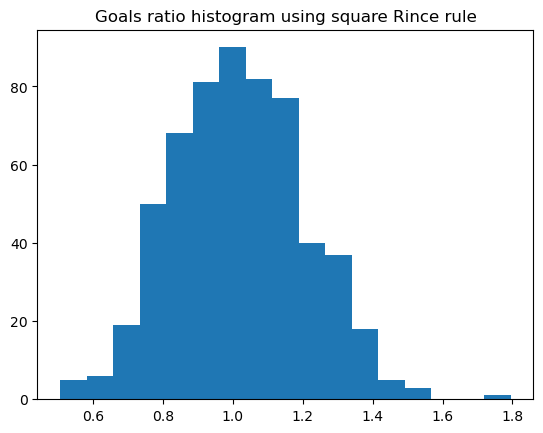

In [24]:
bins_amount = int(2*(df['goals_ratio'].count() ** (1/3))+1)

plt.hist(
    df['goals_ratio'],
    bins=bins_amount
    )

plt.title('Goals ratio histogram using square Rince rule')

### Histogram of the variable using the square root rule

Text(0.5, 1.0, 'Goals ratio histogram using square root rule')

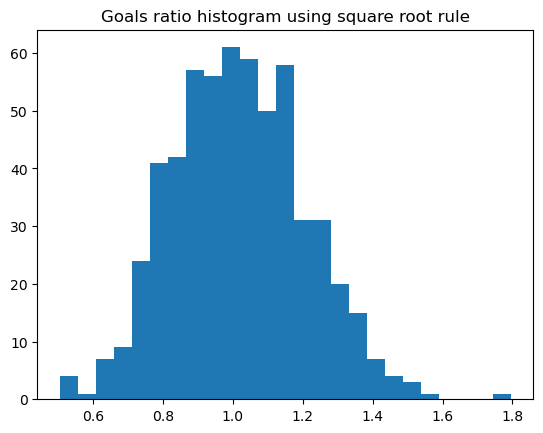

In [25]:
bins_amount = int(df['goals_ratio'].count() ** (1/2)+1)

plt.hist(
    df['goals_ratio'],
    bins=bins_amount
    )

plt.title('Goals ratio histogram using square root rule')

# `victory_percentage`

Similar to the analysis of the variable `goals_ratio`, we will conduct an exploratory analysis of `victory_percentage` by following these steps:  
- Determine the basic descriptive statistics, such as the mean, median, standard deviation, minimum, and maximum.  
- Examine the distribution of the variable by using a histogram to better understand its characteristics.  
- Check if there are any obvious subgroups of teams within the variable under analysis that could be identified based on specific criteria, such as the range of the variable's values.

### Descriptive Statistics

In [26]:
df['victory_percentage'].describe()

count    582.000000
mean       0.458519
std        0.102237
min        0.119000
25%        0.390000
50%        0.463000
75%        0.534000
max        0.756000
Name: victory_percentage, dtype: float64

### Distribution

Here we will create the distribution of the variable, but we won't be doing it in two versions. Instead, we will choose a different, arbitrary number of intervals.

(array([  2.,   4.,   8.,  18.,  39.,  47.,  79.,  76., 107.,  76.,  75.,
         34.,  14.,   2.,   1.]),
 array([0.119     , 0.16146667, 0.20393333, 0.2464    , 0.28886667,
        0.33133333, 0.3738    , 0.41626667, 0.45873333, 0.5012    ,
        0.54366667, 0.58613333, 0.6286    , 0.67106667, 0.71353333,
        0.756     ]),
 <BarContainer object of 15 artists>)

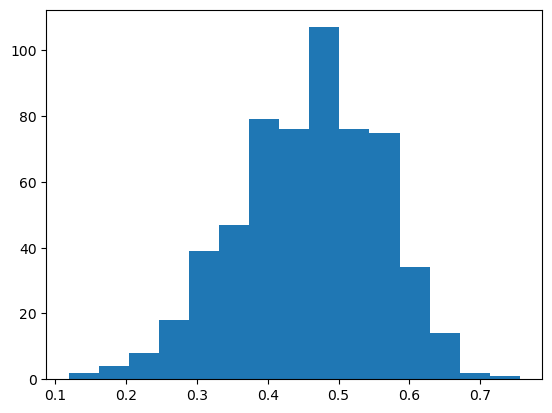

In [27]:
plt.hist(
    df['victory_percentage'],
    bins=15
    )

# `goals_ratio` vs `victory_percentage`

We have already analyzed `goals_ratio` and `victory_percentage` as two separate variables. Now, our task is to analyze them together to identify potential interdependencies between them.  
  
In this step, we will perform the following exercises:  
- Before starting the analysis, let’s consider whether these variables might be dependent or independent of each other. What kind of relationship can be expected based on their business descriptions?  
- We will create a scatterplot to visually represent the dependencies between these variables.  
- We will determine the relationship between the variables based on the scatterplot.  
- We will analyze the scatterplot to identify any outliers, paying special attention to their common distribution.

## Scatterplot of Variables

Now let's create a scatterplot for the two analyzed variables, `goals_ratio` and `victory_percentage`. After completing this step, let's answer the following questions:  
- What is the relationship between the variables `goals_ratio` and `victory_percentage`?  
- Can any outliers be identified in the plot? If so, what criteria were used to identify them?

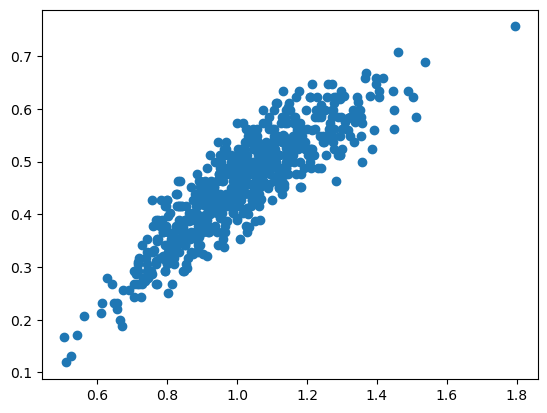

In [28]:
plt.scatter(
    x=df['goals_ratio'],
    y= df['victory_percentage'],
)

> space for chart analysis notes

If we have identified outlying observations at an earlier stage of analysis, let's now examine these specific cases. We will focus on outliers concerning the variables `goals_ratio` and `victory_percentage` to understand what features distinguish them.

The following steps should be taken for analysis:
1. Identify the specific outlying observations that were detected earlier.
2. Analyze the characteristics of these observations, paying attention to their values for the variables `goals_ratio` and `victory_percentage`.
3. Try to understand what might have caused their outlying nature. Are these instances of anomalies, or could they be the result of natural fluctuations in the data?

In [29]:
df.loc[
    (df['goals_ratio'] > 1.6)
    & (df['victory_percentage'] > 0.7)
]

,team,season,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference,goals_ratio
126,Detroit Red Wings,1995,62,13,0,0.756,325,181,144,1.79558


# Summary

In this notebook, we conducted a basic exploratory analysis of our dataset. The data was cleaned and then enriched with new variables, which we subjected to further analysis. The final step of this part is to save the processed data to a CSV file.  
  
**Let's save our data frame to the file:** `data/processed/hockey_teams.csv`, using a semicolon (`;`) as the column separator.

Next, in the following phase of our work, we will propose betting odds based on the analyzed historical data and discuss the results of this analysis.

### Writing the frame to the target location

- file name: `data/processed/hockey_teams.csv`,
- column separator: `;`,
- remember to disable index saving.

In [30]:
df.to_csv(
    '../data/processed/hockey_teams.csv',
    sep=';',
    index=False
)